In [75]:
import os
import pandas as pd
import pymysql


In [77]:
myconnection = pymysql.connect(host='127.0.0.1', user='root', passwd='17562dentsu')
cursor = myconnection.cursor()

# Create database (if it doesn't exist)
cursor.execute("CREATE DATABASE IF NOT EXISTS shopeasy;")

# Close the cursor and connection
cursor.close()
myconnection.close()

# Reconnect to include the database
myconnection = pymysql.connect(host='127.0.0.1', user='root', passwd='17562dentsu',database='shopeasy')
cursor = myconnection.cursor()


In [79]:
# Define dtype mapping from Pandas to MySQL
dtype_mapping = {
    'int64': 'INTEGER',
    'float64': 'FLOAT',
    'object': 'TEXT',
    'datetime64[ns]': 'DATETIME',
    'bool': 'BOOLEAN'
}

# Directory containing CSV files
csv_directory = "C:/GUVI/Projects/01_Customer_Behaviour_Analysis"

# Get all CSV files in the directory
csv_files = [f for f in os.listdir(csv_directory) if f.endswith('.csv')]

# Process each CSV file
for file in csv_files:
    file_path = os.path.join(csv_directory, file)
    
    # Load CSV into DataFrame
    df = pd.read_csv(file_path)
    
    # Print basic details
    print(f"\nProcessing file: {file}")
    print(f"Rows: {len(df)}, Missing Values:\n{df.isnull().sum()}")

    # Map pandas dtypes to MySQL types
    dtype = [dtype_mapping[str(i)] for i in df.dtypes]
    table_column = ",".join(f"{i} {j}" for i, j in zip(df.columns, dtype))

    # Extract table name from filename (without .csv)
    table_name = os.path.splitext(file)[0]

    # Create table
    cursor.execute(f"CREATE TABLE IF NOT EXISTS shopeasy.{table_name} ({table_column})")

    # Prepare SQL insert query
    columns = ", ".join(df.columns)
    placeholders = ", ".join(["%s"] * len(df.columns))
    sql_query = f"INSERT INTO shopeasy.{table_name} ({columns}) VALUES ({placeholders})"

    # Convert DataFrame values into tuples (handling NaN)
    data_tuples = [tuple(None if pd.isna(value) else value for value in row) for row in df.to_numpy()]

    # Insert data efficiently
    if data_tuples:  # Ensure there's data before inserting
        cursor.executemany(sql_query, data_tuples)
        myconnection.commit()

    print(f"Data successfully inserted into table: {table_name}")

cursor.close()
print("\nAll CSV files processed successfully!")



Processing file: customers.csv
Rows: 100, Missing Values:
CustomerID      0
CustomerName    0
Email           0
Gender          0
Age             0
GeographyID     0
dtype: int64
Data successfully inserted into table: customers

Processing file: customer_journey.csv
Rows: 100, Missing Values:
JourneyID      0
CustomerID     0
ProductID      0
VisitDate      0
Stage          0
Action         0
Duration      14
dtype: int64
Data successfully inserted into table: customer_journey

Processing file: customer_reviews.csv
Rows: 100, Missing Values:
ReviewID      0
CustomerID    0
ProductID     0
ReviewDate    0
Rating        0
ReviewText    0
dtype: int64
Data successfully inserted into table: customer_reviews

Processing file: engagement_data.csv
Rows: 100, Missing Values:
EngagementID           0
ContentID              0
ContentType            0
Likes                  0
EngagementDate         0
CampaignID             0
ProductID              0
ViewsClicksCombined    0
dtype: int64
Data suc

In [81]:
pd.read_sql_query('SELECT * FROM customers;',myconnection)

C:\Users\sindh\AppData\Local\Temp\ipykernel_9188\977504298.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query('SELECT * FROM customers;',myconnection)


,CustomerID,CustomerName,Email,Gender,Age,GeographyID
0,1,Emma Anderson,emma.anderson@example.com,Male,50,2
1,2,Sarah Brown,sarah.brown@example.com,Female,37,4
2,3,Robert Hernandez,robert.hernandez@example.com,Female,26,6
3,4,David Garcia,david.garcia@example.com,Male,25,8
4,5,Emma Miller,emma.miller@example.com,Female,41,4
...,...,...,...,...,...,...
95,96,Emily Gonzalez,emily.gonzalez@example.com,Female,38,10
96,97,Emily Rodriguez,emily.rodriguez@example.com,Female,51,3
97,98,Chris Lopez,chris.lopez@example.com,Female,55,10
98,99,Laura Hernandez,laura.hernandez@example.com,Male,41,5


In [23]:
pd.read_sql_query('SELECT * FROM products;',myconnection)

C:\Users\sindh\AppData\Local\Temp\ipykernel_9188\1638309582.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query('SELECT * FROM products;',myconnection)


,ProductID,ProductName,Category,Price
0,1,Running Shoes,Sports,223.75
1,2,Fitness Tracker,Sports,196.68
2,3,Yoga Mat,Sports,485.32
3,4,Dumbbells,Sports,26.21
4,5,Soccer Ball,Sports,41.26
5,6,Tennis Racket,Sports,36.07
6,7,Basketball,Sports,225.12
7,8,Football Helmet,Sports,44.75
8,9,Baseball Glove,Sports,327.36
9,10,Golf Clubs,Sports,81.59


In [83]:
pd.read_sql_query('SELECT * FROM geography;',myconnection)

C:\Users\sindh\AppData\Local\Temp\ipykernel_9188\1270268911.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query('SELECT * FROM geography;',myconnection)


,GeographyID,Country,City
0,1,UK,London
1,2,Germany,Berlin
2,3,France,Paris
3,4,Spain,Madrid
4,5,Italy,Rome
5,6,Netherlands,Amsterdam
6,7,Belgium,Brussels
7,8,Sweden,Stockholm
8,9,Switzerland,Zurich
9,10,Austria,Vienna


In [85]:
pd.read_sql_query('SELECT * FROM customer_journey;',myconnection)

C:\Users\sindh\AppData\Local\Temp\ipykernel_9188\3894016378.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query('SELECT * FROM customer_journey;',myconnection)


,JourneyID,CustomerID,ProductID,VisitDate,Stage,Action,Duration
0,1,64,18,2024-06-10,Checkout,Drop-off,NaN
1,2,94,11,2025-07-09,Checkout,Drop-off,NaN
2,3,34,8,2024-06-14,ProductPage,View,235.0
3,4,33,18,2025-05-28,Checkout,Drop-off,NaN
4,5,91,10,2023-02-11,Homepage,Click,156.0
...,...,...,...,...,...,...,...
95,96,22,9,2024-07-28,ProductPage,View,212.0
96,97,92,19,2025-05-26,homepage,View,203.0
97,98,95,8,2025-05-25,Homepage,Click,68.0
98,99,58,16,2024-07-06,Checkout,Purchase,87.0


In [87]:
pd.read_sql_query('SELECT * FROM engagement_data;',myconnection)

C:\Users\sindh\AppData\Local\Temp\ipykernel_9188\1176453667.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query('SELECT * FROM engagement_data;',myconnection)


,EngagementID,ContentID,ContentType,Likes,EngagementDate,CampaignID,ProductID,ViewsClicksCombined
0,1,39,Blog,190,2023-08-30,1,9,1883-671
1,2,48,Blog,114,2023-03-28,18,20,5280-532
2,3,16,video,32,2023-12-08,7,14,1905-204
3,4,43,Video,17,2025-01-21,19,20,2766-257
4,5,16,newsletter,306,2024-02-21,6,15,5116-1524
...,...,...,...,...,...,...,...,...
95,96,17,Blog,32,2024-07-15,14,13,712-142
96,97,34,blog,3,2025-07-01,16,7,696-47
97,98,44,blog,0,2025-08-20,11,8,231-10
98,99,26,Blog,119,2024-04-15,17,4,3511-479


In [89]:
pd.read_sql_query('SELECT * FROM customer_reviews;',myconnection)

C:\Users\sindh\AppData\Local\Temp\ipykernel_9188\693623446.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query('SELECT * FROM customer_reviews;',myconnection)


,ReviewID,CustomerID,ProductID,ReviewDate,Rating,ReviewText
0,1,77,18,2023-12-23,3,"Average experience, nothing special."
1,2,80,19,2024-12-25,5,The quality is top-notch.
2,3,50,13,2025-01-26,4,Five stars for the quick delivery.
3,4,78,15,2025-04-21,3,"Good quality, but could be cheaper."
4,5,64,2,2023-07-16,3,"Average experience, nothing special."
...,...,...,...,...,...,...
95,96,19,13,2023-09-02,3,"Good quality, but could be cheaper."
96,97,64,6,2024-01-19,3,"The product is okay, but the instruction..."
97,98,96,3,2025-11-20,5,Exceeded my expectations!
98,99,79,16,2025-01-29,2,"Average experience, nothing special."


In [91]:
#Demographic Analysis - As per Region
#Merging customer table with geography to identify the regions of the customer
query = '''
SELECT 
    C.CustomerID, C.CustomerName, C.Gender, C.Age, 
    G.Country, G.City 
FROM customers AS C 
INNER JOIN geography AS G 
ON C.GeographyID = G.GeographyID 
ORDER BY C.CustomerName;
'''

pd.read_sql_query(query,myconnection)

C:\Users\sindh\AppData\Local\Temp\ipykernel_9188\1775551967.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query,myconnection)


,CustomerID,CustomerName,Gender,Age,Country,City
0,30,Alex Garcia,Female,33,Belgium,Brussels
1,48,Alex Gonzalez,Female,48,Belgium,Brussels
2,67,Alex Johnson,Female,56,Spain,Madrid
3,89,Alex Rodriguez,Male,22,Sweden,Stockholm
4,22,Alex Wilson,Male,53,Germany,Berlin
...,...,...,...,...,...,...
95,64,Sarah Martinez,Female,62,Belgium,Brussels
96,29,Sophia Anderson,Female,26,Italy,Rome
97,56,Sophia Davis,Female,66,Switzerland,Zurich
98,72,Sophia Miller,Female,34,Sweden,Stockholm


In [55]:
#To find the no fo customers across region
#Spain/Madrid has more customers - Top 3 countries - Spain, Italy, Germany
#Bottom most countries - France,Switzerland,Sweden

query = '''
SELECT 
     G.country,G.city,COUNT(*) AS No_of_Customers
FROM customers AS C
INNER JOIN geography AS G
ON C.GeographyID=G.GeographyID
GROUP BY G.country,G.city
ORDER BY No_of_Customers desc; 
'''
pd.read_sql_query(query,myconnection)

C:\Users\sindh\AppData\Local\Temp\ipykernel_22748\1783687933.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query,myconnection)


,country,city,No_of_Customers
0,Spain,Madrid,18
1,Italy,Rome,12
2,Germany,Berlin,11
3,Austria,Vienna,10
4,UK,London,10
5,Netherlands,Amsterdam,9
6,Belgium,Brussels,9
7,Sweden,Stockholm,8
8,Switzerland,Zurich,8
9,France,Paris,5


In [93]:
#To find the Gender who have high preference to Shopeasy

query = '''
SELECT 
    COUNT(CASE WHEN Gender = 'Male' THEN 1 END) AS Male_Customers, 
    COUNT(CASE WHEN Gender = 'Female' THEN 1 END) AS Female_Customers 
FROM customers;
'''
pd.read_sql_query(query,myconnection)

C:\Users\sindh\AppData\Local\Temp\ipykernel_9188\4155554535.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query,myconnection)


,Male_Customers,Female_Customers
0,46,54


In [95]:
#To find the Region-wise split on Gender who have high preference to Shopeasy

query = '''
SELECT 
    G.Country,G.City, 
    COUNT(CASE WHEN C.Gender = 'Male' THEN 1 END) AS Male_Customers, 
    COUNT(CASE WHEN C.Gender = 'Female' THEN 1 END) AS Female_Customers 
FROM customers AS C
INNER JOIN geography AS G ON C.GeographyID = G.GeographyID
GROUP BY G.Country, G.City;
'''
pd.read_sql_query(query,myconnection)

C:\Users\sindh\AppData\Local\Temp\ipykernel_9188\2047613906.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query,myconnection)


,Country,City,Male_Customers,Female_Customers
0,Germany,Berlin,4,7
1,Spain,Madrid,9,9
2,Netherlands,Amsterdam,2,7
3,Sweden,Stockholm,4,4
4,Belgium,Brussels,4,5
5,Austria,Vienna,5,5
6,UK,London,7,3
7,Switzerland,Zurich,4,4
8,Italy,Rome,4,8
9,France,Paris,3,2


In [97]:
#Age category who have more interest with Shop Easy and their region.

query = '''
SELECT 
	CASE 
		WHEN Age BETWEEN 18 and 34 THEN '18-34'
		WHEN Age BETWEEN 35 and 44 THEN '35-44'
		WHEN Age BETWEEN 45 and 54 THEN '45-54'
		Else '55+'
	END AS Age_Category,COUNT(*) AS No_of_customers FROM customers
GROUP BY Age_Category 
ORDER BY No_of_customers desc;
'''

pd.read_sql_query(query,myconnection)

C:\Users\sindh\AppData\Local\Temp\ipykernel_9188\3386457428.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query,myconnection)


,Age_Category,No_of_customers
0,18-34,35
1,35-44,25
2,55+,22
3,45-54,18


In [99]:
#Customer Journey & Engagement Analysis:
#Drop-off points in customer journey - Purchase stage 

query = '''
SELECT 
    CustomerID, ProductID, Stage, VisitDate, Action
FROM customer_journey
WHERE Action='Drop-off'
ORDER BY VisitDate DESC;
'''
pd.read_sql_query(query,myconnection)

C:\Users\sindh\AppData\Local\Temp\ipykernel_9188\3166918417.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query,myconnection)


,CustomerID,ProductID,Stage,VisitDate,Action
0,15,9,Checkout,2025-08-07,Drop-off
1,94,11,Checkout,2025-07-09,Drop-off
2,77,6,Checkout,2025-06-25,Drop-off
3,33,18,Checkout,2025-05-28,Drop-off
4,9,11,checkout,2024-11-19,Drop-off
5,38,17,Checkout,2024-06-18,Drop-off
6,64,18,Checkout,2024-06-10,Drop-off
7,1,7,Checkout,2024-03-17,Drop-off
8,58,20,Checkout,2024-03-07,Drop-off
9,30,20,checkout,2024-02-18,Drop-off


In [101]:
#Common Actions Leading to Successful Conventions

query = '''
WITH SuccessfulConversions AS (
    SELECT DISTINCT CustomerID, ProductID, VisitDate
    FROM customer_journey
    WHERE Stage = 'Checkout' AND Action != 'Drop-off'
),

PreConversionActions AS (
    SELECT cj.CustomerID, cj.ProductID, cj.VisitDate, cj.Stage, cj.Action
    FROM customer_journey cj
    JOIN SuccessfulConversions sc 
    ON cj.CustomerID = sc.CustomerID 
    AND cj.ProductID = sc.ProductID 
    AND cj.VisitDate <= sc.VisitDate
)

SELECT 
    Stage, Action, COUNT(*) AS ActionCount
FROM PreConversionActions
GROUP BY Stage, Action
ORDER BY ActionCount DESC;
'''
pd.read_sql_query(query,myconnection)

C:\Users\sindh\AppData\Local\Temp\ipykernel_9188\2837575986.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query,myconnection)


,Stage,Action,ActionCount
0,Checkout,Purchase,6


In [103]:
#Calculate average duration per stage for engagement insights

query = '''
SELECT 
    Stage, ROUND(AVG(Duration),2) AS Average_Duration
FROM customer_journey
WHERE Duration IS NOT NULL
GROUP BY stage
ORDER BY Average_Duration DESC;
'''
pd.read_sql_query(query,myconnection)

C:\Users\sindh\AppData\Local\Temp\ipykernel_9188\2023216380.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query,myconnection)


,Stage,Average_Duration
0,ProductPage,182.77
1,Homepage,160.54
2,Checkout,150.17


In [105]:
#Customer Reviews Analysis
#High rated products

query = '''
SELECT
    P.productID,P.ProductName,R.Rating
FROM customer_reviews AS R
INNER JOIN products AS P
ON R.productID=P.productID
WHERE R.Rating=5
GROUP BY P.productID,P.ProductName;
'''

pd.read_sql_query(query,myconnection)

C:\Users\sindh\AppData\Local\Temp\ipykernel_9188\1661796618.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query,myconnection)


,productID,ProductName,Rating
0,1,Running Shoes,5
1,2,Fitness Tracker,5
2,3,Yoga Mat,5
3,4,Dumbbells,5
4,6,Tennis Racket,5
5,8,Football Helmet,5
6,10,Golf Clubs,5
7,11,Ski Boots,5
8,15,Climbing Rope,5
9,17,Surfboard,5


In [107]:
#lOW rated products

query = '''
SELECT
    P.productID,P.ProductName,R.Rating
FROM customer_reviews AS R
INNER JOIN products AS P
ON R.productID=P.productID
WHERE R.Rating=1
GROUP BY P.productID,P.ProductName;
'''

pd.read_sql_query(query,myconnection)

C:\Users\sindh\AppData\Local\Temp\ipykernel_9188\2932243036.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query,myconnection)


,productID,ProductName,Rating
0,3,Yoga Mat,1
1,4,Dumbbells,1
2,6,Tennis Racket,1


In [109]:
#Average rating for each product which helps to analyse product performance from customer's perspective
#Most popular product as per the number of reviews

query = '''
SELECT 
    P.productID,P.ProductName,AVG(R.Rating) AS Average_Rating,COUNT(*) AS No_of_reviews
FROM customer_reviews AS R
INNER JOIN products AS P
on R.productID=P.productID
GROUP BY P.productID,P.ProductName
ORDER BY Average_Rating DESC;
'''

pd.read_sql_query(query,myconnection)

C:\Users\sindh\AppData\Local\Temp\ipykernel_9188\3387710621.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query,myconnection)


,productID,ProductName,Average_Rating,No_of_reviews
0,8,Football Helmet,5.0000,3
1,19,Hockey Stick,4.4000,5
2,18,Volleyball,4.0000,3
3,15,Climbing Rope,4.0000,6
4,1,Running Shoes,4.0000,4
5,11,Ski Boots,4.0000,6
6,20,Boxing Gloves,4.0000,2
7,5,Soccer Ball,4.0000,3
8,17,Surfboard,3.8889,9
9,6,Tennis Racket,3.8571,7


In [55]:
#Yearly review trends of each product and product performance

query = '''
SELECT 
    R.ProductID,P.ProductName,DATE_FORMAT(R.ReviewDate, '%Y') AS Year, AVG(R.Rating) AS AvgRating, COUNT(*) AS TotalReviews
FROM customer_reviews AS R
INNER JOIN products AS P
on R.ProductID=P.ProductID
GROUP BY R.ProductID, P.ProductName,DATE_FORMAT(R.ReviewDate, '%Y')
ORDER BY DATE_FORMAT(R.ReviewDate, '%Y'), R.ProductID;
'''

review_trends = pd.read_sql_query(query,myconnection)
review_trends

C:\Users\sindh\AppData\Local\Temp\ipykernel_9188\1312196228.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  review_trends = pd.read_sql_query(query,myconnection)


,ProductID,ProductName,Year,AvgRating,TotalReviews
0,1,Running Shoes,2023,4.5000,2
1,2,Fitness Tracker,2023,3.5000,2
2,3,Yoga Mat,2023,3.0000,1
3,4,Dumbbells,2023,3.0000,2
4,5,Soccer Ball,2023,4.0000,1
5,6,Tennis Racket,2023,1.0000,1
6,7,Basketball,2023,3.0000,1
7,8,Football Helmet,2023,5.0000,1
8,9,Baseball Glove,2023,3.5000,2
9,11,Ski Boots,2023,5.0000,1


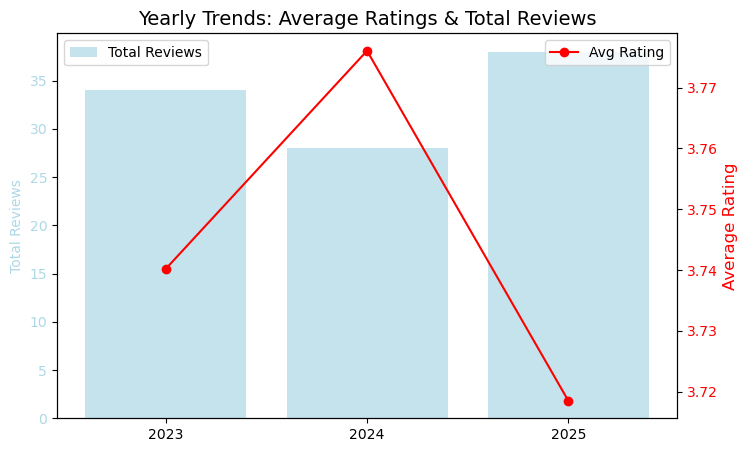

In [111]:
import matplotlib.pyplot as plt

# Group data by Year
yearly_avg_rating = review_trends.groupby("Year")["AvgRating"].mean()
yearly_total_reviews = review_trends.groupby("Year")["TotalReviews"].sum()

# Create figure
fig, ax1 = plt.subplots(figsize=(8, 5))

# Bar chart for total reviews per year
ax1.bar(yearly_total_reviews.index, yearly_total_reviews, color='lightblue', label='Total Reviews', alpha=0.7)
ax1.set_ylabel("Total Reviews", color='lightblue', fontsize=10)
ax1.tick_params(axis='y', labelcolor='lightblue')

# Line chart for average rating per year
ax2 = ax1.twinx()
ax2.plot(yearly_avg_rating.index, yearly_avg_rating, color='red', marker='o', linestyle='-', label='Avg Rating')
ax2.set_ylabel("Average Rating", color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Title and labels
plt.title("Yearly Trends: Average Ratings & Total Reviews", fontsize=14)
ax1.set_xticks(yearly_avg_rating.index)  # Ensure all years are shown on x-axis

# Legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Show the plot
plt.show()

In [113]:
#Sentiment Analysis
#Creating a Sentiment table 

cursor = myconnection.cursor()
cursor.execute('CREATE TABLE IF NOT EXISTS Sentiment (Word VARCHAR(50),Feedback_Style VARCHAR(10));')
sentiment_data = [('good', 'Positive'), ('excellent', 'Positive'), ('top-notch', 'Positive'),
                  ('helpful', 'Positive'), ('amazing', 'Positive'), ('bad', 'Negative'),
                  ('poor', 'Negative'), ('expensive', 'Negative'), ('worst', 'Negative'),
                  ('slow', 'Negative'), ('average', 'Neutral'), ('nothing special', 'Neutral')]
cursor.executemany("INSERT INTO Sentiment (Word, Feedback_Style) VALUES (%s, %s);", sentiment_data)
myconnection.commit()
cursor.close()
print(" Sentiment Table created and data inserted successfully!")

 Sentiment Table created and data inserted successfully!


In [115]:
#Assigning positive,negative and neutral categories to the reviews

query = '''
SELECT C.ReviewID, C.ProductID, P.ProductName, C.ReviewText, 
	   CASE 
           WHEN EXISTS (SELECT 1 FROM Sentiment AS S WHERE C.ReviewText LIKE CONCAT('%', S.Word, '%') AND S.Feedback_Style = 'Positive') THEN 'Positive'
           WHEN EXISTS (SELECT 1 FROM Sentiment AS S WHERE C.ReviewText LIKE CONCAT('%', S.Word, '%') AND S.Feedback_Style = 'Negative') THEN 'Negative'
           ELSE 'Neutral'
       END AS Sentiment
FROM customer_reviews AS C
INNER JOIN products as P
ON C.productID = P.ProductID;
'''
pd.read_sql_query(query,myconnection)

C:\Users\sindh\AppData\Local\Temp\ipykernel_9188\2790238948.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query,myconnection)


,ReviewID,ProductID,ProductName,ReviewText,Sentiment
0,1,18,Volleyball,"Average experience, nothing special.",Neutral
1,2,19,Hockey Stick,The quality is top-notch.,Positive
2,3,13,Swim Goggles,Five stars for the quick delivery.,Neutral
3,4,15,Climbing Rope,"Good quality, but could be cheaper.",Positive
4,5,2,Fitness Tracker,"Average experience, nothing special.",Neutral
...,...,...,...,...,...
95,96,13,Swim Goggles,"Good quality, but could be cheaper.",Positive
96,97,6,Tennis Racket,"The product is okay, but the instruction...",Neutral
97,98,3,Yoga Mat,Exceeded my expectations!,Neutral
98,99,16,Kayak,"Average experience, nothing special.",Neutral


In [93]:
#To analyse the products with more positive/negative reviews and without reviews

query = '''
SELECT A.ProductID, P.ProductName,
       COUNT(CASE WHEN S.Feedback_Style = 'Positive' THEN 1 END) AS PositiveReviews,
       COUNT(CASE WHEN S.Feedback_Style = 'Negative' THEN 1 END) AS NegativeReviews,
       COUNT(CASE WHEN S.Feedback_Style = 'Neutral' THEN 1 END) AS NeutralReviews
FROM customer_reviews AS A
INNER JOIN PRODUCTS AS P ON P.ProductID = A.ProductID
LEFT JOIN Sentiment AS S ON A.ReviewText LIKE CONCAT('%', S.Word, '%')
GROUP BY A.ProductID, P.ProductName;
'''

pd.read_sql_query(query,myconnection)

C:\Users\sindh\AppData\Local\Temp\ipykernel_22748\1573523037.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query,myconnection)


,ProductID,ProductName,PositiveReviews,NegativeReviews,NeutralReviews
0,18,Volleyball,0,0,1
1,19,Hockey Stick,1,0,0
2,13,Swim Goggles,2,0,1
3,15,Climbing Rope,3,0,0
4,2,Fitness Tracker,1,0,1
5,1,Running Shoes,3,0,1
6,8,Football Helmet,2,0,0
7,6,Tennis Racket,2,1,0
8,9,Baseball Glove,2,0,0
9,11,Ski Boots,3,0,0


In [117]:
#Marketing Effectiveness
#Retention rate calculation - In 2025 it is higher, customer engagement is better, Measure used to analyse loyalty trends

query = '''
WITH YearlyCustomers AS (
    SELECT 
        YEAR(VisitDate) AS VisitYear, 
        CustomerID,
        COUNT(*) AS VisitCount
    FROM customer_journey
    GROUP BY VisitYear, CustomerID
),

RetainedCustomers AS (
    SELECT 
        a.VisitYear,
        COUNT(DISTINCT a.CustomerID) AS RetainedCustomerCount
    FROM YearlyCustomers a
    JOIN YearlyCustomers b
        ON a.CustomerID = b.CustomerID 
        AND a.VisitYear = b.VisitYear + 1
    GROUP BY a.VisitYear
),

TotalCustomers AS (
    SELECT 
        VisitYear, 
        COUNT(DISTINCT CustomerID) AS TotalCustomerCount
    FROM YearlyCustomers
    GROUP BY VisitYear
)

SELECT 
    t.VisitYear, 
    COALESCE(r.RetainedCustomerCount, 0) AS RetainedCustomers, 
    t.TotalCustomerCount AS NewCustomers,
    CASE 
        WHEN t.TotalCustomerCount = 0 THEN 0
        ELSE ROUND((COALESCE(r.RetainedCustomerCount, 0) / t.TotalCustomerCount) * 100, 2)
    END AS RetentionRate
FROM TotalCustomers t
LEFT JOIN RetainedCustomers r 
    ON t.VisitYear = r.VisitYear;
'''
pd.read_sql_query(query,myconnection)

C:\Users\sindh\AppData\Local\Temp\ipykernel_9188\2110299467.py:45: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query,myconnection)


,VisitYear,RetainedCustomers,NewCustomers,RetentionRate
0,2023,0,29,0.00
1,2024,8,27,29.63
2,2025,11,32,34.38


In [123]:
#Compare First time buyer Vs. Repeat Buyer

query = '''
SELECT 
    CASE 
        WHEN VisitCount = 1 THEN 'First-Time Buyer'
        ELSE 'Repeat Buyer'
    END AS BuyerType,
    COUNT(CustomerID) AS CustomerCount
FROM (SELECT CustomerID,COUNT(DISTINCT VisitDate) AS VisitCount FROM customer_journey WHERE Action = 'Purchase' GROUP BY CustomerID) as CustomerVisits
GROUP BY BuyerType;
'''
pd.read_sql_query(query,myconnection)

C:\Users\sindh\AppData\Local\Temp\ipykernel_9188\791799872.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query,myconnection)


,BuyerType,CustomerCount
0,First-Time Buyer,6


In [67]:
# Top performing product per region

query = '''
WITH ProductPerformance AS (
    SELECT 
		G.Country,
        G.City,
        c.ProductID,
        p.ProductName,
        COUNT(c.CustomerID) AS TotalPurchases,  -- Total purchases per product
        SUM(c.Duration) AS TotalEngagement,  -- Total engagement time spent
        RANK() OVER (PARTITION BY G.Country ORDER BY COUNT(c.CustomerID) DESC) AS RankBySales
    FROM customer_journey c
    JOIN products p ON c.ProductID = p.ProductID
    JOIN customers A ON A.CustomerID = c.CustomerID
    JOIN Geography G ON G.GeographyID = A.GeographyID
    GROUP BY G.Country,G.city, c.ProductID, p.ProductName
)

SELECT * FROM ProductPerformance WHERE RankBySales=1;
'''
pd.read_sql_query(query,myconnection)

C:\Users\sindh\AppData\Local\Temp\ipykernel_9188\4028920002.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query,myconnection)


,Country,City,ProductID,ProductName,TotalPurchases,TotalEngagement,RankBySales
0,Austria,Vienna,20,Boxing Gloves,3,251.0,1
1,Austria,Vienna,1,Running Shoes,3,527.0,1
2,Belgium,Brussels,2,Fitness Tracker,2,503.0,1
3,Belgium,Brussels,6,Tennis Racket,2,279.0,1
4,France,Paris,4,Dumbbells,1,100.0,1
5,France,Paris,11,Ski Boots,1,234.0,1
6,France,Paris,14,Cycling Helmet,1,29.0,1
7,France,Paris,8,Football Helmet,1,235.0,1
8,France,Paris,12,Ice Skates,1,227.0,1
9,France,Paris,9,Baseball Glove,1,214.0,1


In [69]:
#Engagement Data Analysis

query = '''
SELECT 
    ContentType,
    COUNT(*) AS TotalEngagements,
    SUM(Likes) AS TotalLikes,
    AVG(Likes) AS AvgLikes,
    SUM(SUBSTRING_INDEX(ViewsClicksCombined, '-', 1)) AS TotalViews,
    SUM(SUBSTRING_INDEX(ViewsClicksCombined, '-', -1)) AS TotalClicks
FROM engagement_data
GROUP BY ContentType
ORDER BY TotalLikes DESC;
'''
pd.read_sql_query(query,myconnection)

C:\Users\sindh\AppData\Local\Temp\ipykernel_9188\2553698420.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query,myconnection)


,ContentType,TotalEngagements,TotalLikes,AvgLikes,TotalViews,TotalClicks
0,video,31,3473.0,112.0323,64073.0,13803.0
1,Blog,28,2999.0,107.1071,65977.0,14300.0
2,Socialmedia,24,2594.0,108.0833,59936.0,12498.0
3,newsletter,17,1380.0,81.1765,37059.0,6350.0


In [71]:
myconnection.close() #Close the connection